# Parametric reliability data analysis

In [ ]:
# Following to allow use of ramsmod library.
import sys
!{sys.executable} -m pip install ramsmod

## Load example data sets

Load data sets that were generated from exponential, Weibull and log-normal distributions.

In [3]:
from ramsmod.datasets import *

exp_data = load_exponential_data() # Exponential data set.
wb_data = load_weibull_data() # Weibull data set.
lognorm_data = load_lognormal_data() # Log-normal data set.

## Non-parametric analysis

First a non-parameteric analysis is performed, using the Kaplan-Meier method, to obtain estimated reliability function for each set of failure data.

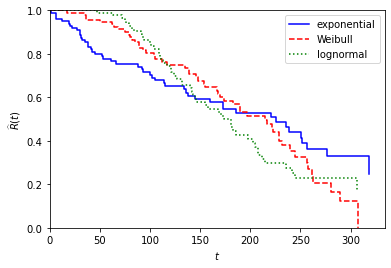

In [4]:
from ramsmod.fitting import kaplan_meier_fit
from ramsmod.plotting import plot_np_reliability
import matplotlib.pyplot as plt

exp_kmf = kaplan_meier_fit(exp_data['t'], exp_data['d'], ci='egw')
ax = plot_np_reliability(exp_kmf['t'], exp_kmf['R'], label="exponential")

wb_kmf = kaplan_meier_fit(wb_data['t'], wb_data['d'], ci='egw')
ax = plot_np_reliability(wb_kmf['t'], wb_kmf['R'], linestyle='--', 
                         color='red', ax=ax, label='Weibull')

lognorm_kmf = kaplan_meier_fit(lognorm_data['t'], lognorm_data['d'], ci='egw')
ax = plot_np_reliability(lognorm_kmf['t'], lognorm_kmf['R'], linestyle=':',
                         color='green', ax=ax, label='lognormal')

plt.legend()
plt.xlim(0)
plt.ylim(0,1)

plt.savefig('figs/km-parametric-datasets.pdf')

## Probability plotting

Linearised probability plots are then used to determine if the reliability functions for each set of failure data follow a particular parametric distribution (in this example, it already known to be the case of course).

C:\Users\OruStandalone\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\OruStandalone\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


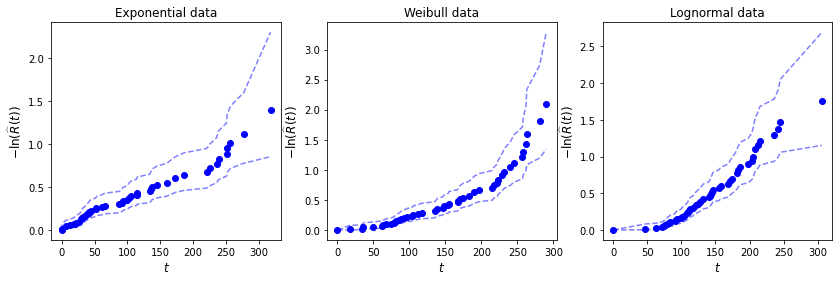

In [5]:
from ramsmod.plotting import plot_exponential_prob_plot

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

plot_exponential_prob_plot(exp_kmf['t'], exp_kmf['R'], 
                           exp_kmf['CI Lower'], exp_kmf['CI Upper'], ax1)
ax1.set_title('Exponential data')

plot_exponential_prob_plot(wb_kmf['t'], wb_kmf['R'], wb_kmf['CI Lower'],
                           wb_kmf['CI Upper'], ax=ax2)
ax2.set_title('Weibull data')

plot_exponential_prob_plot(lognorm_kmf['t'], lognorm_kmf['R'], 
                           lognorm_kmf['CI Lower'], lognorm_kmf['CI Upper'], ax=ax3)
ax3.set_title('Lognormal data')

figure = plt.gcf()
figure.set_size_inches(14, 4)
plt.savefig('figs/expon-prob-plot.pdf')

The failure data generated from an exponential distribution plots as a straight line when the exponential linearised transformation is applied, as expected.

C:\Users\OruStandalone\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\OruStandalone\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\OruStandalone\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\OruStandalone\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\OruStandalone\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\OruStandalone\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: d

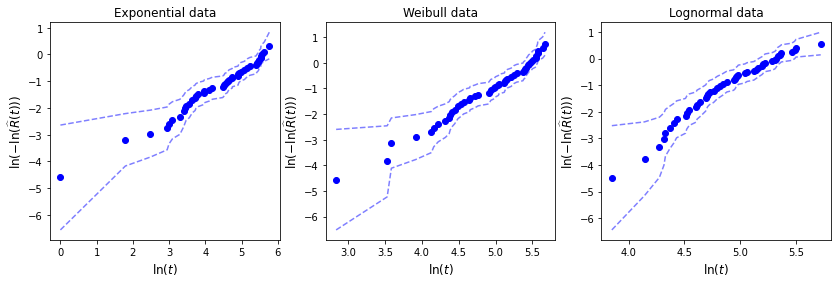

In [6]:
from ramsmod.plotting import plot_weibull_prob_plot

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

plot_weibull_prob_plot(exp_kmf['t'], exp_kmf['R'], 
                           exp_kmf['CI Lower'], exp_kmf['CI Upper'], ax1)
ax1.set_title('Exponential data')

plot_weibull_prob_plot(wb_kmf['t'], wb_kmf['R'], wb_kmf['CI Lower'],
                           wb_kmf['CI Upper'], ax=ax2)
ax2.set_title('Weibull data')

plot_weibull_prob_plot(lognorm_kmf['t'], lognorm_kmf['R'], 
                           lognorm_kmf['CI Lower'], lognorm_kmf['CI Upper'], ax=ax3)
ax3.set_title('Lognormal data')

figure = plt.gcf()
figure.set_size_inches(14, 4)
plt.savefig('figs/weibull-prob-plot.pdf')

Here both the exponential and Weibull failure data plot as a straight line when the Weibull linearised transformation is applied. Note that the exponential distribution is a special case of the Weibull distribution where the shape parameter is equal to 1, therefore it is expected that it also plots as a straight line here!

C:\Users\OruStandalone\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\OruStandalone\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\OruStandalone\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


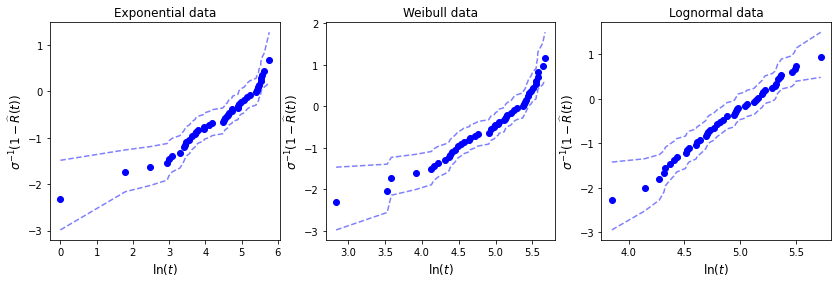

In [7]:
from ramsmod.plotting import plot_lognormal_prob_plot

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

plot_lognormal_prob_plot(exp_kmf['t'], exp_kmf['R'], 
                           exp_kmf['CI Lower'], exp_kmf['CI Upper'], ax1)
ax1.set_title('Exponential data')

plot_lognormal_prob_plot(wb_kmf['t'], wb_kmf['R'], wb_kmf['CI Lower'],
                           wb_kmf['CI Upper'], ax=ax2)
ax2.set_title('Weibull data')

plot_lognormal_prob_plot(lognorm_kmf['t'], lognorm_kmf['R'], 
                           lognorm_kmf['CI Lower'], lognorm_kmf['CI Upper'], ax=ax3)
ax3.set_title('Lognormal data')

figure = plt.gcf()
figure.set_size_inches(14, 4)
plt.savefig('figs/lognormal-prob-plot.pdf')

Only the failure data generated from a log-normal distribution plots as a straight line when the log-normal transformation is applied to the data, as expected.

## Maximum likelihood parameter estimation

The functions provided in the ramsmod library for plotting the maximum likelihood parameter estimates require that the failure data is provided in terms of the lower and upper bounds on the failure times (i.e. in interval censored format). Since the data sets used in this example are in right-censored format, they need to be converted into the interval censored format first. The survival times of right-censored failure data provide the lower bound of the failure time, they also provide the upper bound if it was an exact failure time observation. If the failure time was right-censored, then all thats known is that the failure occurred at some later time, therefore the upper bound failure time is infinity. This conversion is quite easy to do using Pandas by using the `where` method to apply if-else logic, forming the upper bounds by taking the time values from the right-censored data where the censoring indicator variable is equal to 1 and using infinity otherwise:

In [8]:
import pandas as pd
import numpy as np

# Define a function to perform the conversion.
def right_to_interval_censored(right_censored_data):
    tmin = right_censored_data['t'] # Lower bounds.
    tmax = tmin.where(right_censored_data['d']==1, np.inf) # Upper bounds.

    return pd.DataFrame({'tmin':tmin, 'tmax':tmax})

# Now convert the failure data sets into interval censored format.
exp_data_ic = right_to_interval_censored(exp_data)
wb_data_ic = right_to_interval_censored(wb_data)
lognorm_data_ic = right_to_interval_censored(lognorm_data)

,tmin,tmax
Observation #,,
1,239.0,239.0
2,108.0,inf
3,277.0,277.0
4,236.0,236.0
5,100.0,inf


### Failure data from exponential distribution.

Plot the relative likelihoods of a range of scale parameter values for the failure data generated from an exponential distribution with scale parameter of 300. In this case, we know that the true scale parameter value is 300 so a range including this value can be chosen, in practice where you don't know the true value (hence why you are analysing the data), you can use the estimates from probability plotting as a guide.

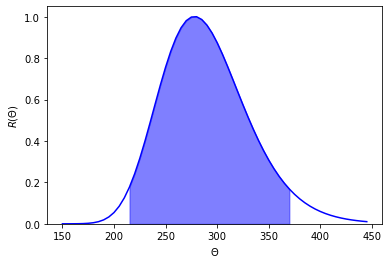

In [9]:
from ramsmod.plotting import plot_exponential_relative_likelihoods
min_scale = 150
max_scale = 450
step_scale = 5

plot_exponential_relative_likelihoods(exp_data_ic['tmin'], exp_data_ic['tmax'], min_scale, max_scale, step_scale, ci_alpha=0.05)

plt.savefig('figs/exponential-ml-plot.pdf')

For this data, the maximum likelihood value (i.e. where the relative likelihood is 1) for the scale parameter is slightly less than the true value of 300 that was used to generate the failure data. The plot also shows that the 95% confidence interval covers scale parameter values of between approximately 220 and 370.

### Failure data from Weibull distribution.


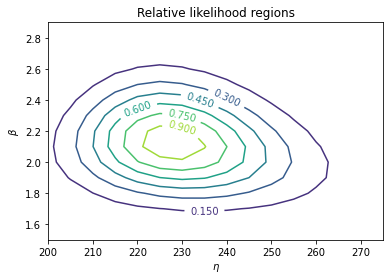

In [10]:
from ramsmod.plotting import plot_weibull_relative_likelihoods

min_shape = 1.5
max_shape = 3
step_shape = 0.1
min_scale = 200
max_scale = 280
step_scale = 5

plot_weibull_relative_likelihoods(wb_data_ic['tmin'], wb_data_ic['tmax'], min_shape, max_shape, step_shape, min_scale, max_scale, step_scale, label_as_confidence=False)

plt.savefig('figs/weibull-ml-relative-likelihood-plot.pdf')

This shows that the region with highest likelihood (relative likelihoods of greater than 0.9) is for shape parameters between approximately 2 and 2.2 and scale parameters between approximately 220 and 240, compared to the true values of 2 and 250, respectively, that was used to generate the data.

The plot can also be drawn with the regions labelled by the level of confidence that it contains the true parameter values by setting `label_as_confidence=True`:plot_weibull_relative_likelihoods(wb_data_ic['tmin'], wb_data_ic['tmax'], min_shape, max_shape, step_shape, min_scale, max_scale, step_scale, label_as_confidence=False).

C:\Users\OruStandalone\anaconda3\lib\site-packages\ramsmod\plotting.py:381: RuntimeWarning: divide by zero encountered in log
  value = 100*chi2.cdf(-2 * np.log(level), df=2).round(2)


Help on function plot_weibull_relative_likelihoods in module ramsmod.plotting:

plot_weibull_relative_likelihoods(tmin, tmax, min_shape, max_shape, step_shape, min_scale, max_scale, step_scale, label_as_confidence=False, ax=None)
    Plots (as a contour plot) the relative likelihoods corresponding to parameter values
    of the Weibull distribution for a set of interval censored failure data.
    :param tmin: The lower bounds for the failure time observations.
    :param tmax: The upper bounds for the failure time observations.
    :param min_shape: The minimum value for the shape parameter included on the plot.
    :param max_shape: The maximum value for the shape parameter included on the plot.
    :param step_shape: The step (increment) between plotted shape parameter values.
    :param min_scale: The minimum value for the scale parameter included on the plot.
    :param max_scale: The maximum value for the scale parameter included on the plot.
    :param step_scale: The step (incre

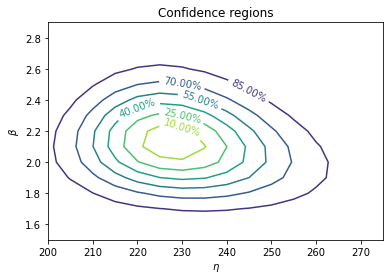

In [11]:
plot_weibull_relative_likelihoods(wb_data_ic['tmin'], wb_data_ic['tmax'], min_shape, max_shape, step_shape, min_scale, max_scale, step_scale, label_as_confidence=True)
plt.savefig('figs/weibull-ml-confidence-plot.pdf')

This plot shows that the 85% confidence level region covers shape and scale paramters in the approximate respective intervals of (1.8, 2.6) and (200, 260), showing that at high confidence levels only rough estimates of the parameters can be made from the sample failure data.

### Failure data from log-normal distribution.

Now repeat for the failure data from the log-normal distribution:

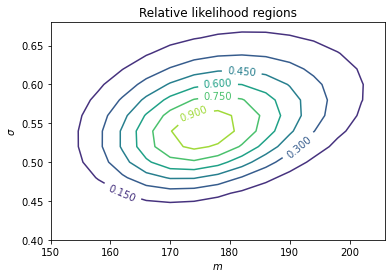

In [13]:
from ramsmod.plotting import plot_lognormal_relative_likelihoods

min_shape = 0.4
max_shape = 0.7
step_shape = 0.02
min_scale = 150
max_scale = 210
step_scale = 4

plot_lognormal_relative_likelihoods(lognorm_data_ic['tmin'], lognorm_data_ic['tmax'], min_shape, max_shape, step_shape, min_scale, max_scale, step_scale, label_as_confidence=False)
plt.savefig('figs/lognormal-ml-relative-likelihood-plot.pdf')

From this plot, the maximum likelihood region (relative likelihood of greater than 0.9) covers shape parameters approximately between 0.52 and 0.57 and scale parameters approximately between 170 and 180. The true parameter values used to generate the data of 0.5 and 170 respectively, therefore lie very close to this region and have high relative likelihood.  

In [ ]:
plot_lognormal_relative_likelihoods(lognorm_data_ic['tmin'], lognorm_data_ic['tmax'], min_shape, max_shape, step_shape, min_scale, max_scale, step_scale, label_as_confidence=True)
plt.savefig('figs/lognormal-ml-confidence-plot.pdf')

As with the plots for the Weibull data, the 85% confidence level region covers quite a large range of possible parameter values, indicating that more data is needed to make high confidence predictions of the parameter values at high precisions.